<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Download_raw_data_for_webpages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading raw analysis data and input/output files
For each JARVIS-ID, there is a respective XML document which can bw downloaded and all the raw data can be parsed from that XML. Also, the raw input/output
files for each calculation is distributed through Figshare repository
, links for each are given at the bottom of the webpage.



In [2]:
!pip install jarvis-tools

Text(0, 0.5, 'Eps-x')

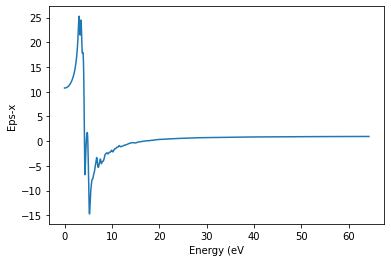

In [3]:
import numpy as np
import os
from jarvis.core.utils import xml_to_dict
cmd="!wget https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-1002.xml"
os.system(cmd)
d=xml_to_dict('JVASP-1002.xml')
energies=np.array(d['basic_info']['main_optics_mbj']['main_optics_mbj_info']['energies'].strip("'").split(','),dtype='float')
real_part_x=np.array(d['basic_info']['main_optics_mbj']['main_optics_mbj_info']['real_1'].strip("'").split(','),dtype='float')
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(energies,real_part_x)
plt.xlabel('Energy (eV')
plt.ylabel('Eps-x')

# Raw input/output files are also available at the bottom of each webpage
# For example:
#"TBMBJ": https://ndownloader.figshare.com/files/23571836
#"OPT-OPTICS": https://ndownloader.figshare.com/files/24035894

In [4]:
# For other key-value pairs, see :
d['basic_info'].keys()

odict_keys(['convergence_info', 'wannier_band_comparison', 'vacancy_formation_energy', 'raman_dat', 'main_relax_info', 'main_band', 'main_hse06_band', 'effective_mass', 'main_pbe0_band', 'main_optics_semilocal', 'main_optics_mbj', 'main_elastic', 'main_boltz', 'main_lepsilon_info', 'main_spillage_info', 'efg_raw_tensor', 'max_efg', 'max_efg_eta', 'main_stm_neg', 'main_stm_pos'])